In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import plotly.express as px

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lmz
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from scipy import stats
import pingouin as pg

import numpy as np
import scipy.stats as st
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression


ImportError: cannot import name 'anova_lmz' from 'statsmodels.stats.api' (C:\Users\Mi\anaconda3\lib\site-packages\statsmodels\stats\api.py)

In [ ]:
!pip install outdated

# 1. Data Exploration and Processing

Название датасета: Netflix Data: Cleaning, Analysis and Visualization

Ссылка: https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization/code

Netflix — популярный стриминговый сервис, который предлагает обширный каталог фильмов, телешоу и оригинального контента. Данные состоят из контента, добавленного в Netflix с 2008 по 2021 год. Самый старый контент датирован 1925 годом, а самый новый — 2021 годом. 
Датасет включает 8791 строку.


  Описание полей:

•	show_id: идентификационный номер видео

•	type: тип 
Тип: Movie/TV Show

•	title: название 

•	director: имя режиссера

•	country: страна-производитель 
•	date_added: дата и время, когда видео было добавлен в netflix

•	release_year: год выпуска

•	rating: возрастное ограничение

-- PG-13 (Parents Strongly Cautioned) - рекомендуется присутствие родителей для детей до 13 лет из-за насилия, сексуальных сцен, ненормативной лексики или других материалов, которые могут не подходить для детей;

--	TV-MA (Mature Audience Only) - контент только для взрослых;

--	TV-PG (Parental Guidance Suggested) - рекомендуется присутствие родителей из-за материалов, которые могут не подходить для детей;

--	TV-14 (Parents Strongly Cautioned) - рекомендуется присутствие родителей или взрослых из-за материалов, которые могут не подходить для детей до 14 лет;

--	TV-Y7 (Directed to Older Children) - содержание может быть не подходящим для детей младше 7 лет;

--	TV-Y (All Children) - содержание подходит для всех детей;

--	PG (Parental Guidance Suggested) - рекомендуется родительское присутствие для детей до 13 лет;

--	TV-G (General Audience) - содержание подходит для всех возрастов;

--	R (Restricted) - лицам до 17 лет обязательно присутствие взрослых из-за насилия, сексуальных сцен, ненормативной лексики или других материалов, которые могут не подходить для детей;

--	G (General Audiences) - фильмы для всех возрастов;

--	NC-17 (No Children Under 17 Admitted) - фильмы только для взрослых;

--	NR (Not Rated) - рейтинг не присвоен;

--	TV-Y7-FV (Directed to Older Children - Fantasy Violence) - содержание может быть не подходящим для детей младше 7 лет из-за насилия в фантастическом контексте;

--	UR (Unrated) - рейтинг не присвоен или неизвестен.

•	duration: продолжительность видео

•	listed_in: жанр


In [229]:
Netflix=pd.read_csv('archive.zip', parse_dates=['date_added'])
Netflix.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# 2. Processing and Analysis of Dataset

# 2.1. Processing of data

In [230]:
#search of null values
Netflix.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [231]:
#rename of columvs
Netflix = Netflix.rename(columns={'listed_in': 'genres'})

In [232]:
#remove of  null values
Netflix=Netflix.dropna()

In [233]:
#remove of duplicates
Netflix = Netflix.drop_duplicates()

This dataset contains video products by genre, which can contain several genres at the same time. However, the main genre is the name that comes first.
To analyze video products by genre, we will distinguish only those genres that are key:

In [234]:
#selecting a key video genre for analysis
Netflix[['genres', 'genres_2']] = Netflix['genres']. str.split(',', 1 , expand= True )
Netflix.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,genres,genres_2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,"International TV Shows, TV Action & Adventure"
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,"TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,Comedies
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,"Independent Movies, International Movies"


To analyze the dataset by year, it's needed split the date and select the years:

In [235]:
#adding a column with years
Netflix['year_added']=Netflix['date_added'].dt.to_period('Y')
Netflix.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,genres,genres_2,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,None,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,"International TV Shows, TV Action & Adventure",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,"TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,Comedies,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,"Independent Movies, International Movies",2021


In [236]:
Netflix = Netflix.drop('genres_2', axis=1)
Netflix = Netflix.drop('date_added', axis=1)

In [237]:
Netflix.head(5)

,show_id,type,title,director,country,release_year,rating,duration,genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,Crime TV Shows,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,TV Dramas,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,Children & Family Movies,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,Dramas,2021


# 2.2. Analysis of data

In [238]:
def first_check(dataset):

    print()
    print('Первые 5 строк таблицы')
    display(dataset.head(5))

    print()
    print('Последние 5 строк таблицы')
    display(dataset.tail(5))

    print()
    print('Информация о таблице')   
    print(dataset.info())

    print()
    print('Наименование колонок')  
    print(dataset.columns)
         
    print()
    print('Типы колонок')  
    print(Netflix.shape)
    
    print()
    print('Типы колонок')  
    print(Netflix.dtypes)

In [239]:
first_check(Netflix)


Первые 5 строк таблицы


,show_id,type,title,director,country,release_year,rating,duration,genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,Crime TV Shows,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,TV Dramas,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,Children & Family Movies,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,Dramas,2021



Последние 5 строк таблицы


,show_id,type,title,director,country,release_year,rating,duration,genres,year_added
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,2 Seasons,International TV Shows,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,3 Seasons,Kids' TV,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,1 Season,International TV Shows,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,1 Season,Kids' TV,2018
8789,s8786,TV Show,YOM,Not Given,Pakistan,2016,TV-Y7,1 Season,Kids' TV,2018



Информация о таблице
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   show_id       8790 non-null   object       
 1   type          8790 non-null   object       
 2   title         8790 non-null   object       
 3   director      8790 non-null   object       
 4   country       8790 non-null   object       
 5   release_year  8790 non-null   int64        
 6   rating        8790 non-null   object       
 7   duration      8790 non-null   object       
 8   genres        8790 non-null   object       
 9   year_added    8790 non-null   period[A-DEC]
dtypes: int64(1), object(8), period[A-DEC](1)
memory usage: 755.4+ KB
None

Наименование колонок
Index(['show_id', 'type', 'title', 'director', 'country', 'release_year',
       'rating', 'duration', 'genres', 'year_added'],
      dtype='object')

Типы колонок
(8790, 10)

Типы колон

In [240]:
Netflix.nunique(axis=0)

show_id         8790
type               2
title           8787
director        4528
country           86
release_year      74
rating            14
duration         220
genres            36
year_added        14
dtype: int64

# 2.3. Detailed dataset analysis: statistical groupings

In [241]:
Movies=Netflix[Netflix['type']=='Movie']
Movies_perc=Movies.type.count()/Netflix.type.count()*100
Movies_perc

69.69283276450511

In [242]:
Shows_perc=100-Movies_perc
Shows_perc

30.307167235494887

In [243]:
Netflix

,show_id,type,title,director,country,release_year,rating,duration,genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,Crime TV Shows,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,TV Dramas,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,Children & Family Movies,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,Dramas,2021
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016,TV-PG,2 Seasons,International TV Shows,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2016,TV-Y7,3 Seasons,Kids' TV,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012,TV-PG,1 Season,International TV Shows,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2016,TV-Y,1 Season,Kids' TV,2018


In [244]:
movie_genres=Netflix.groupby(['type','genres'], as_index=False).agg({'duration':'count'}).sort_values('duration', ascending=False).query("type=='Movie'").rename(columns={'duration':'count'}).head(5)
movie_genres.head(2)

,type,genres,count
7,Movie,Dramas,1599
4,Movie,Comedies,1210


In [245]:
movie_genres['perc']=movie_genres['count']/Netflix.release_year.count()*100
movie_genres.head(2)

,type,genres,count,perc
7,Movie,Dramas,1599,18.191126
4,Movie,Comedies,1210,13.765643


In [246]:
shows_genres=Netflix.groupby(['type','genres'], as_index=False).agg({'duration':'count'}).sort_values('duration', ascending=False).query("type=='TV Show'").rename(columns={'duration':'count'}).head(5)
shows_genres.head(5)

,type,genres,count
24,TV Show,International TV Shows,773
22,TV Show,Crime TV Shows,399
25,TV Show,Kids' TV,385
20,TV Show,British TV Shows,252
23,TV Show,Docuseries,220


In [247]:
shows_genres['perc']=shows_genres['count']/Netflix.release_year.count()*100
shows_genres

,type,genres,count,perc
24,TV Show,International TV Shows,773,8.794084
22,TV Show,Crime TV Shows,399,4.539249
25,TV Show,Kids' TV,385,4.379977
20,TV Show,British TV Shows,252,2.866894
23,TV Show,Docuseries,220,2.502844


The largest number of movies by genre are drama - 1599 (18.2%), comedies - 1210 (13.7%), and adventure - 859 (9.8%).

The largest number of TV shows by genre are international TV shows - 773 (8.8%), crime - 399 (4.5%), and children's - 385 (4.4%).

In [248]:
year_added=Netflix.year_added.value_counts().loc[lambda x: x>50].to_frame()
year_added['perc']=year_added['year_added']/Netflix.release_year.count()*100
year_added

,year_added,perc
2019,2016,22.935154
2020,1879,21.376564
2018,1648,18.748578
2021,1498,17.042093
2017,1185,13.481229
2016,426,4.846416
2015,82,0.932878


The largest number of movies were added to the Netflix website in 2019 - 2016 (22.9% of all movies), in 2020 - 1879 (21.4%), in 2018 - 1648 movies (18.7%), in 2017 - 1498 movies (17.1%).

In [249]:
df_countries=Netflix['country'].value_counts().loc[lambda x : x > 100].to_frame()
df_countries.rename
df_countries = df_countries.rename(columns={'country': 'count'})
df_countries['perc']=df_countries['count']/Netflix['country'].count()*100
df_countries.head(6)

,count,perc
United States,3240,36.860068
India,1057,12.025028
United Kingdom,638,7.258248
Pakistan,421,4.789534
Not Given,287,3.265074
Canada,271,3.083049


The largest number of movies hosted on Netflix were released in the USA - 3240 movies (36.8%), in India - 1057 (12%), in the UK - 638 (7.3%), in Pakistan - 421 (4.8%).

In [250]:
ratings=pd.crosstab(Netflix.rating, Netflix.type, margins=True)
ratings['Movie_perc']=ratings['Movie']/6126*100
ratings['TV show_perc']=ratings['TV Show']/2664*100
ratings

type,Movie,TV Show,All,Movie_perc,TV show_perc
rating,,,,,
G,41,0,41,0.669278,0.000000
NC-17,3,0,3,0.048972,0.000000
NR,75,4,79,1.224290,0.150150
PG,287,0,287,4.684949,0.000000
PG-13,490,0,490,7.998694,0.000000
R,797,2,799,13.010121,0.075075
TV-14,1427,730,2157,23.294156,27.402402
TV-G,126,94,220,2.056807,3.528529
TV-MA,2062,1143,3205,33.659811,42.905405


In [251]:
ratings.sort_values('Movie', ascending=False).head(5)

type,Movie,TV Show,All,Movie_perc,TV show_perc
rating,,,,,
All,6126,2664,8790,100.000000,100.000000
TV-MA,2062,1143,3205,33.659811,42.905405
TV-14,1427,730,2157,23.294156,27.402402
R,797,2,799,13.010121,0.075075
TV-PG,540,321,861,8.814887,12.049550


In [252]:
ratings.sort_values('TV show_perc', ascending=False).head(5)

type,Movie,TV Show,All,Movie_perc,TV show_perc
rating,,,,,
All,6126,2664,8790,100.000000,100.000000
TV-MA,2062,1143,3205,33.659811,42.905405
TV-14,1427,730,2157,23.294156,27.402402
TV-PG,540,321,861,8.814887,12.049550
TV-Y7,139,194,333,2.269017,7.282282


The largest number of movies on the Netflix website among all movies with a rating for adults only is 2062 (33.65%), followed by movies with a recommendation for viewing for ages 14+ only with parents (23.3%). As for TV shows and series, those with a rating for adults only are 1143 (42.9%), and those with a recommendation for viewing for ages 14+ only with parents are 27.4%.

# 2.4 Conclusions

The Netflix dataset provides information on ID numbers, types (movie or series/TV shows), titles, director names, country of origin of films, date added to the Netflix website, year of release of video products, and age limit.
In total, this dataset contains 8787 films. Because there are 8790 lines in the dataset, several lines contain repetitions, which does not require additional cleaning.

In this dataset, films make up 69.7% of all available video products, TV series – 30.3%.

The largest number of films in the entire sample of this dataset was released in 2018 - 1146 (13%), in 2017 and 2019 - 1030 (11.7%), in 2020 - 953 (10.8%). The largest number of films hosted on Netflix was released in the US - 3240 films (36.8%), India - 1057 (12%), UK - 638 (7.3%), Pakistan - 421 (4.8%).
The 1st place in terms of the number of video products on the Netflix website, by country, type and year, is occupied by the United States (307 films in 2017).


The largest number of films were added to the Netflix website in 2019 - 2016 (22.9% of all films), in 2020 - 1879 (21.4%), in 2018 - 1648 films (18.7%), in 2017 - 1498 films (17.1%).

The largest number of films in the genre of drama - 1599 (18.2%), comedy - 1210 (13.7%) and adventure - 859 (9.8%).
The largest number of series and TV shows in the genre of international TV shows - 773 (8.8%), crime - 399 (4.5%) and for children - 385 (4.4%).

The highest number of films on the Netflix site of all films rated only for adults - 2062 (33.65%), in second place - films with a recommendation for viewing 14+ only with parents (23.3%), series and TV shows - with an adult rating only - 1143 (42.9%), films with a recommendation for viewing 14+ only with parents (27.4%)


# 3.Visualization

# 3.1. Visualization by country and genres

In [253]:
Netflix_TV=Netflix[Netflix['type']=='TV Show']
Netflix.head(5)

,show_id,type,title,director,country,release_year,rating,duration,genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,Crime TV Shows,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,TV Dramas,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,Children & Family Movies,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,Dramas,2021


In [254]:
plt.figure(figsize=[20,10])
order1 = Netflix_TV.groupby('genres').count().sort_values(by = 'show_id',ascending=False)[0:7].index
df_tv_f = Netflix_TV[Netflix_TV['genres'].isin(order1)]
order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:7].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=Netflix_TV.date_added.dt.year
tv_g = sns.countplot(data=df_tv_f,x='country',hue='genres', palette='Reds_r', order=order2)
tv_g.set_xlabel('Country',fontsize = 20)
tv_g.set_ylabel('Number of TV Shows',fontsize = 20)
tv_g.set_title("Relationship between Netflix TV Show Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre', loc = 'upper right')

AttributeError: 'DataFrame' object has no attribute 'date_added'

<Figure size 1440x720 with 0 Axes>

Thus, it can be concluded that in the USA, the first place in terms of TV shows produced by genre for all years is occupied by children's TV shows and documentary series, in Pakistan (in terms of quantity) - international TV shows, in the UK - reality shows, in Japan - documentary series, and in South Korea, India, and Taiwan - international TV shows.

In [ ]:
Netflix_Movies=Netflix[Netflix['type']=='Movie']
Netflix_Movies

In [255]:
plt.figure(figsize=[20,10])
order1 = Netflix_Movies.groupby('genres').count().sort_values(by = 'show_id',ascending=False)[0:7].index
df_tv_f = Netflix_Movies[Netflix_Movies['genres'].isin(order1)]
order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:7].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=Netflix_TV.date_added.dt.year
tv_g = sns.countplot(data=df_tv_f,x='country',hue='genres', palette='Reds_r', order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of Movies',fontsize = 15)
tv_g.set_title("Relationship between Netflix TV Show Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre', loc = 'upper right')

AttributeError: 'DataFrame' object has no attribute 'date_added'

<Figure size 1440x720 with 0 Axes>

Thus, it can be concluded that in the USA, the first place in terms of movies released by genre for all years is occupied by dramas and documentary films, followed by comedies. In India, dramas take the first place, while in the UK, documentary films are the most prevalent.

Таким образом, наибольшее количество фильмов, загруженных на нетфтликс – фильмы для взрослых, на втором месте – для дтей 14+ с рекомендацией к просмотру только с родителями.

# 3.2. Analysis of the dynamics of downloaded video products

In [256]:
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=Netflix.date_added.dt.year, data=Netflix, hue='type', palette = "Reds_r")
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)

AttributeError: 'DataFrame' object has no attribute 'date_added'

<Figure size 1440x720 with 0 Axes>

The number of movies added to the Netflix platform in 2018 and 2019 combined exceeded the total number of movies added in previous years from 2008 to 2017. In addition, the number of movies on Netflix in 2018 was almost four times greater than the number of TV shows. The number of movies uploaded to Netflix had a positive trend until 2019, after which it began to decline.

The decrease in the volume of uploaded movies was lower in 2019 compared to 2020, 2021 in all countries that are in the top for the number of uploaded movies in the USA, India, and the UK. This may be due to the pandemic or the fact that in the early years of Netflix's active operation, it constantly loaded movies that were not previously available.

# 3.3. Analytics TOP-10

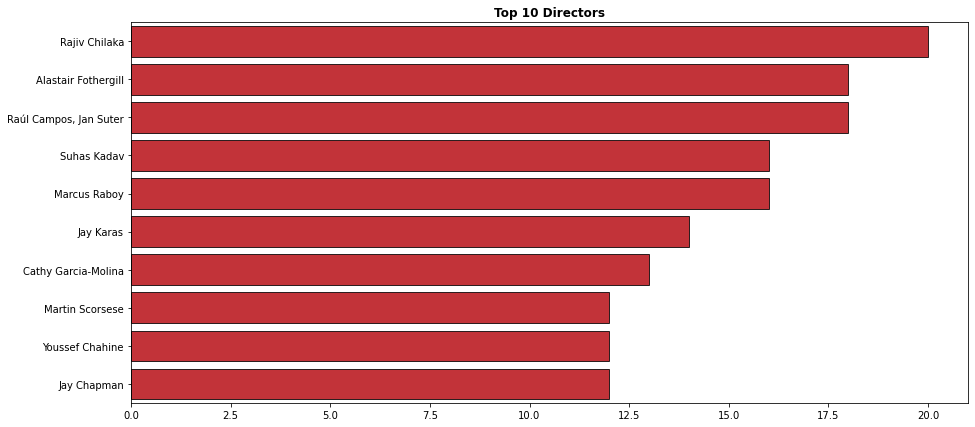

In [257]:
plt.figure(figsize = (15,7))
top_10 = Netflix['director'].value_counts().drop('Not Given').head(10)
sns.barplot(x = top_10.values, y  = top_10.index , edgecolor = 'k', linewidth = 1, saturation = 11, color = '#b30007', alpha =0.8)

plt.title("Top 10 Directors", fontsize = 12, fontweight = 'heavy')
plt.show()

At the top of the list for the number of released video content are Rajiv Chilaka, Alastair Forthergill, Raul Campos, and Jan Suter.

Rajiv Chilaka is an Indian film director and producer. He is the founder and CEO of Green Gold Animation, a company that specializes in producing animated films and TV shows.

Alastair Forthergill is a well-known British producer and director of nature documentaries. He is a co-founder of Silverback Films, which produces documentaries such as "Planet Earth II," "Our Planet," and "Wild Islands."

Raul Campos and Jan Suter are radio hosts on KCRW radio station in Los Angeles, USA. They are the hosts of the "Metropolis" program, which airs every night and is dedicated to contemporary music.

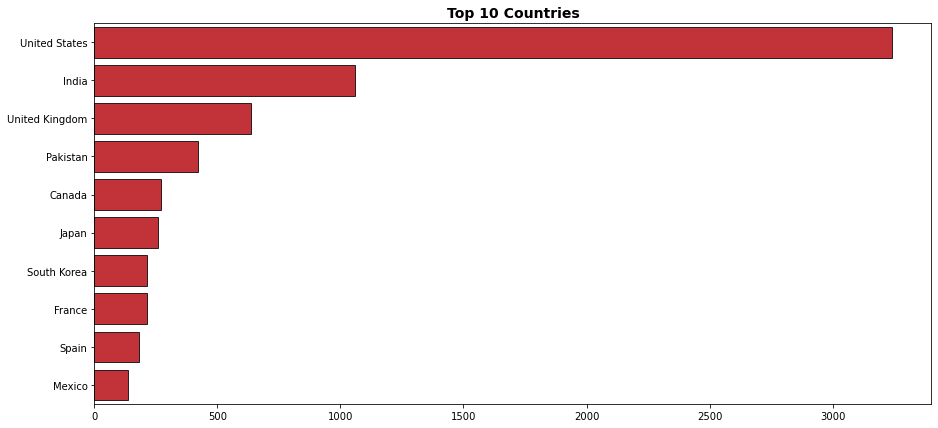

In [258]:
plt.figure(figsize = (15,7))
top_10 = Netflix['country'].value_counts().drop('Not Given').head(10)
sns.barplot(x = top_10.values, y  = top_10.index , edgecolor = 'k', linewidth = 1, saturation = 1, color = '#b30007', alpha =0.8)

plt.title("Top 10 Countries", fontsize = 14, fontweight = 'heavy')
plt.show()

In terms of the number of video content uploaded to Netflix, the leading positions are occupied by the USA, India, and the UK.

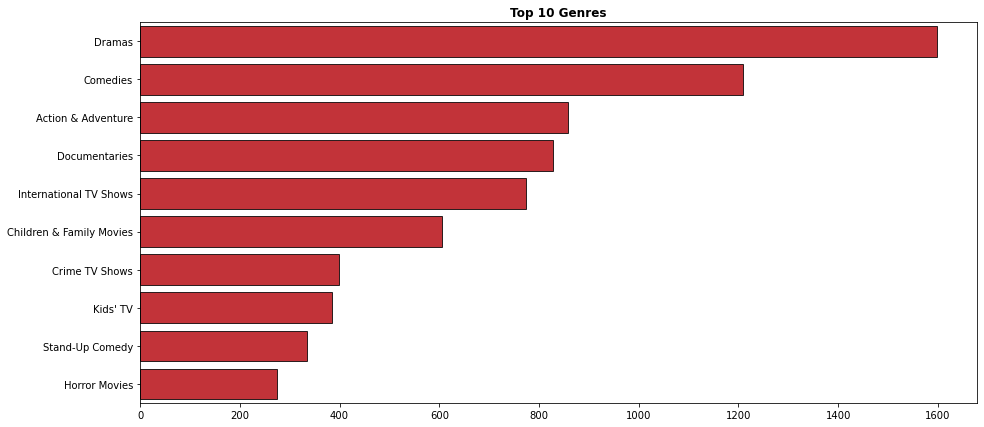

In [259]:
plt.figure(figsize = (15,7))
top_10 = Netflix['genres'].value_counts().head(10)
sns.barplot(x = top_10.values, y  = top_10.index , edgecolor = 'k', linewidth = 1, saturation = 11, color = '#b30007', alpha =0.8)

plt.title("Top 10 Genres", fontsize = 12, fontweight = 'heavy')
plt.show()

The largest amount of video content uploaded to Netflix is comprised of dramas, comedies, and adventures.



# 3.4. Age rating detalization

<AxesSubplot:xlabel='rating', ylabel='count'>

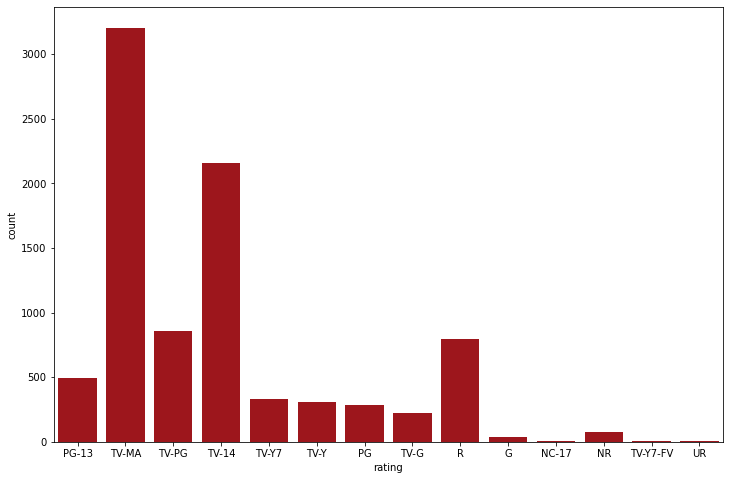

In [260]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = Netflix, linewidth = 2, color = "#b30007")



The graph contains values by the number of films by ratings, which are used to classify content in cinema, television and other media formats depending on whether it is suitable for children and what age category.

According to the age limit, video products that are suitable for viewing only by adults prevail, in second place is content for children 14+ for viewing with parents.


# 3.5. Map chart

In [261]:
data=pd.read_csv('archive.zip', parse_dates=['date_added'])

In [262]:
year_country2 = data.groupby('release_year')['country'].value_counts().reset_index(name='counts')
year_country2

,release_year,country,counts
0,1925,Pakistan,1
1,1942,United States,2
2,1943,United States,3
3,1944,United States,3
4,1945,United States,4
...,...,...,...
885,2021,Philippines,1
886,2021,Russia,1
887,2021,Taiwan,1
888,2021,Uruguay,1


In [263]:
import plotly.express as px

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='release_year',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()